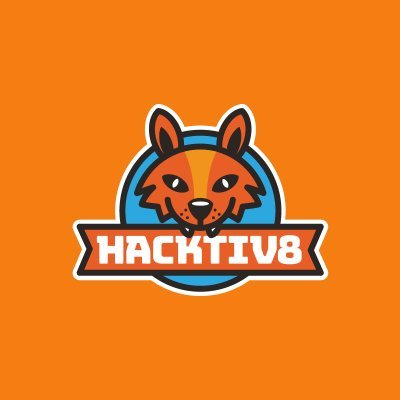

# **FINAL PROJECT 4**

Team :
1. LUKMAN PRASETYO NUGROHO PYTN-KS09-004



# **A. Perkenalan**
**Latar Belakang**

Bank termasuk kedalam industri keuangan yang aktifitasnya melakukan pengelolaan keuangan. Mulai dari menerima simpanan, giro, tabungan, dan deposito. Selain itu bank juga meminjamkan uang atau biasa disebut kredit kepada perseorangan atau perusahaan yang membutuhkan. 
Bank dalam perjalanannya bersaing dengan kompetitor, sehingga membutuhkan strategi pemasaran produk yang efektif dan efesien. Salah satu yang dibutuhkan oleh bank yaitu melakukan segmentasi nasabah berdasarkan pola kebiasaan setiap nasabah. 
Berdasarkan latar belakang tersebut, maka tujuan yang akan dicapai yaitu mengetaui segmentasi nasabah dari dataset Credit Card Dataset for Clustering sebagai landasan saat pengambilan keputusan

Link Dataset https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/code


# **B. Import Library**
Bagian ini berisi library apa saja yang di pakai oleh program pada final project 4 

In [387]:
# import library preprocessing dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics

#!pip install umap-learn[plot]
from umap import UMAP
import umap.plot

import pickle


# **C. Data Loading**
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

1. Menjalankan perintah untuk menghubungkan google colab dengan google drive (digunakan untuk meletakkan data yang diletakkan di folder fp4 )

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [388]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/MyDrive/dataset'

In [389]:
%cd drive/MyDrive/dataset/fp4

[Errno 2] No such file or directory: 'drive/MyDrive/dataset/fp4'
/content/drive/MyDrive/dataset/fp4


2. Mendownload dataset yang berasal dari kaggle kemudian di ekstrak 

In [11]:
!kaggle datasets download -d arjunbhasin2013/ccdata

ccdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip ccdata

Archive:  ccdata.zip
replace CC GENERAL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

3. Menampilkan dataset yang akan diolah

In [390]:
#Menampilkan data
df = pd.read_csv('ccdata.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Dari data diatas kita dapat mengetahui bentuk dari lima data teratas dan lima data terbawah.

4. Melihat Tipe data dari data diatas

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Diketahui terdapat 8950 baris dengan 18 kolom yang terdiri dari tipe data object, float dan int

5. Melihat nama kolom yang ada didalam dataset

In [392]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

6. Melihat Statistik Deskriptif (Hanya untuk data yang bertipe numerik)


In [393]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Berdasarkan data diatas dapat diketahui count, mean, min, max, std, dan nilai lainnya yang berhubungan dengan dataset.

7. Melihat statistik deskriptif dari masing-masing atribut yang bertipe object

In [394]:
df.describe(include='O').T

,count,unique,top,freq
CUST_ID,8950,8950,C10001,1


Hanya ada satu yang bertipe data object yaitu data yang berada di kolom CUST_ID

# **D. Data Cleaning**
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

1. Melanjutkan proses yang ada di data loading, maka selanjutnya melihat data yang terduplicate

In [395]:
df.duplicated().sum()

0

Diketahui tidak ada data yang terduplicate

2. Melihat Missing Value yang ada didalam dataset


In [292]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Diketahui terdapat missing value pada kolom **CREDIT_LIMIT** sebanyak 1 dan kolom **MINIMUM_PAYMENTS** sebanyak 313 baris


3. Mengisi Missing value dengan median

In [396]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Kemudian cek kembali

In [397]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Diketahui sudah tidak ada yang terduplicate

4. Menghapus kolom CUST_ID alasannya kolom tersebut berisi atribut yang tidak diperlukan saat diolah

In [398]:
df = df.drop('CUST_ID', axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Sekarang CUST_ID telah terhapus

# **E. EDA : Explorasi data analysis**
Setelah melakukan data cleaning, kita akan menampilkan data serta mereview data kembali, dan Pada bagian ini berisi explorasi data yang lebih mendalam, menggunakan quary, grouping, visualisasi sederhana, dan hal lainnya jika di perlukan

1. Melihat statistik deskriptif pada dataset

In [399]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Terlihat bahwa dalam dataset:

- Balance rata-rata yaitu 1564 dan saldo maksimal yaitu 19043.
- Balance_Frekuensi rata-rata 0,87 dan maksimal 1
- Purchases rata rata 1003 dan maksimal 49039
Dan lain sejenisnya yang dapat dilihat pada kolom diatas

2. Melihat rata rata pembayaran nasabah selama 12 bulan serta nominal terbesarnya

In [400]:
df.loc[df['TENURE'] == 12, 'PAYMENTS'].agg(('max', 'mean'))

max     50721.483360
mean     1853.606676
Name: PAYMENTS, dtype: float64

Diketahui rata rata pembayaran selama 12 bulan 1853 dengan nominal terbesar 50721. 

3. Melihat data histori top record dengan melakukan query

Tenure dengan Balance

In [401]:
df[
    (df['TENURE'] == 12) & (df['PURCHASES'] == 0.0) 
]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
14,2772.772734,1.000000,0.0,0.0,0.0,346.811390,0.0,0.0,0.0,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
35,1656.350781,1.000000,0.0,0.0,0.0,99.264367,0.0,0.0,0.0,0.083333,1,0,1800.0,351.500199,634.569311,0.000000,12
40,663.447810,0.727273,0.0,0.0,0.0,3133.063934,0.0,0.0,0.0,0.250000,3,0,1800.0,3067.057830,283.333445,0.166667,12
43,1360.742377,1.000000,0.0,0.0,0.0,1481.587093,0.0,0.0,0.0,0.083333,1,0,1500.0,378.294227,321.354137,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,2492.463204,1.000000,0.0,0.0,0.0,2625.644609,0.0,0.0,0.0,0.250000,7,0,3000.0,621.099464,1073.237454,0.000000,12
8730,45.747578,0.363636,0.0,0.0,0.0,201.529984,0.0,0.0,0.0,0.083333,2,0,1200.0,491.502618,106.285000,0.333333,12
8734,407.399529,1.000000,0.0,0.0,0.0,1364.307564,0.0,0.0,0.0,0.166667,2,0,1500.0,98.494145,228.622281,0.000000,12
8752,0.979061,0.272727,0.0,0.0,0.0,329.930650,0.0,0.0,0.0,0.083333,1,0,500.0,1316.748413,1.721007,1.000000,12


Diketahui balance terbesar yaitu 3202

4. Melihat Pembelian angsuran tertinggi

In [402]:
df.loc[df['TENURE'] == 12, 'INSTALLMENTS_PURCHASES'].agg(('max', 'mean'))

max     22500.000000
mean      448.010364
Name: INSTALLMENTS_PURCHASES, dtype: float64

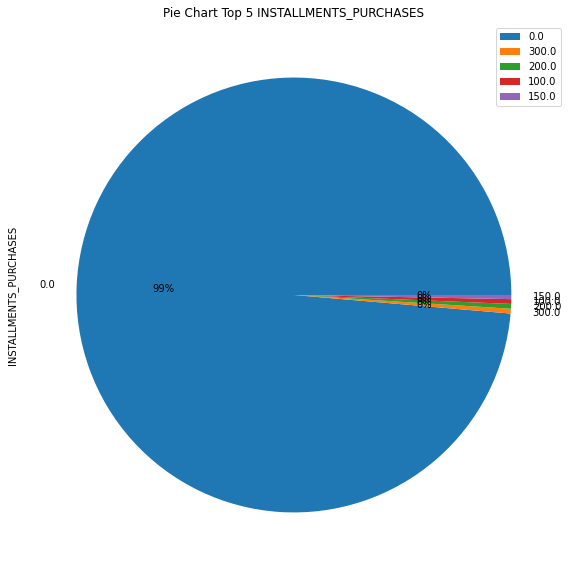

In [403]:
#Visualisasi dari pembelian angsuran tertinggi
df_v = pd.DataFrame(df['INSTALLMENTS_PURCHASES'].value_counts())
plot = df_v.head().plot.pie(y='INSTALLMENTS_PURCHASES', figsize=(10,10), autopct='%1.0f%%');

plt.title("Pie Chart Top 5 INSTALLMENTS_PURCHASES")
plt.show()

Dari data diatas diketahui 0, 300, 200, 100, 150

5. Visualisasi Menggunakan histogram dari masing masing kolom untuk meliah data terbesar dan terendah dari setiap kolom

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50fc773a30>,
      dtype=object)

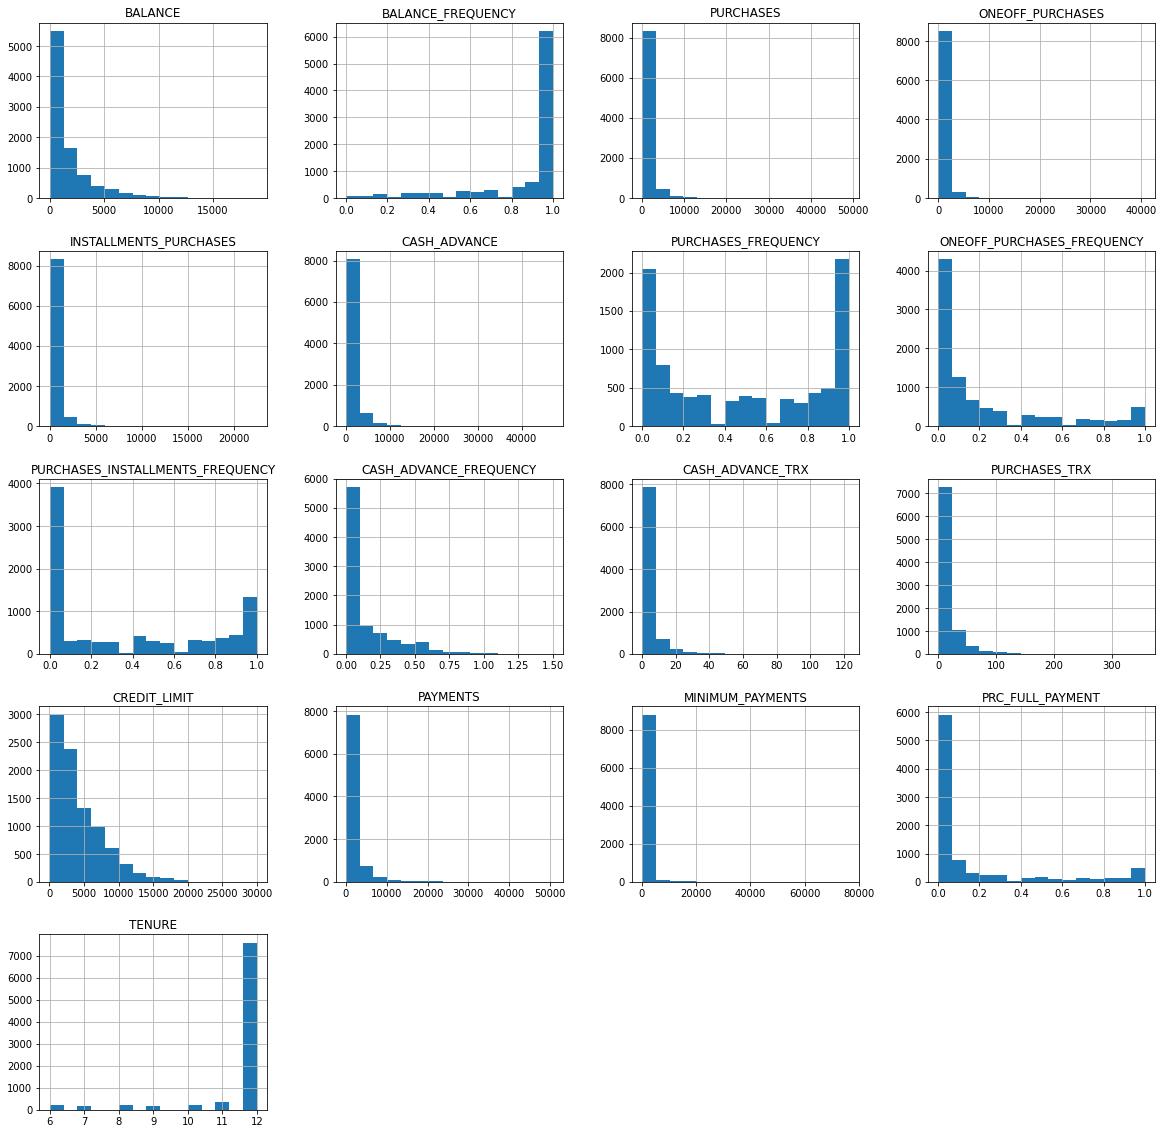

In [404]:
num_col = df.columns
df[num_col].hist(bins=15, figsize=(20, 20), layout=(5, 4))

6. Visualisasi Menggunakan melihat distribusi data, outlier data dari setiap kolom

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

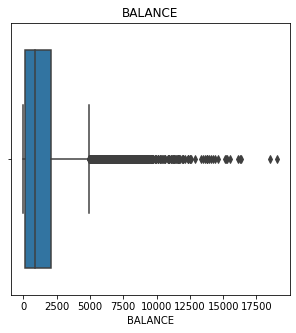

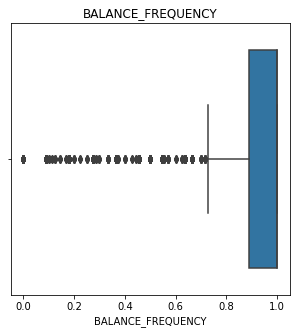

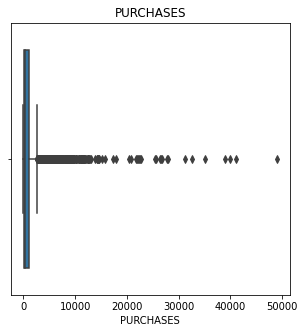

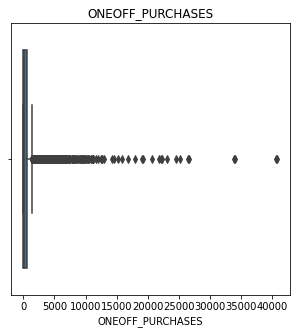

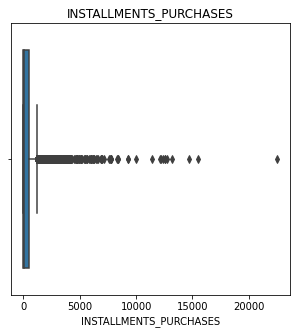

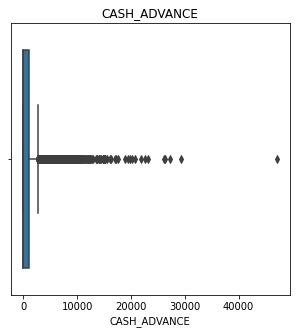

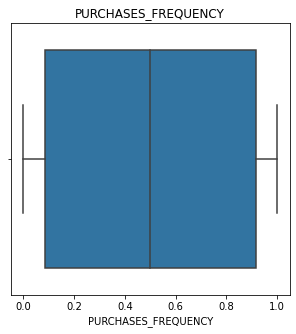

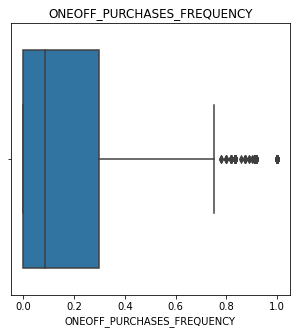

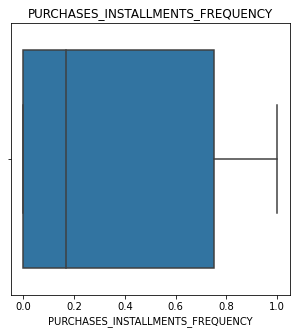

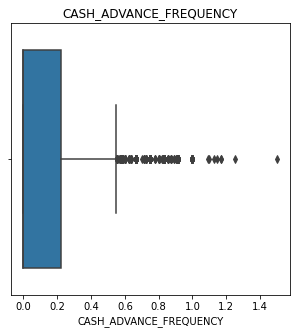

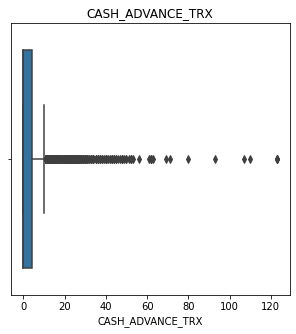

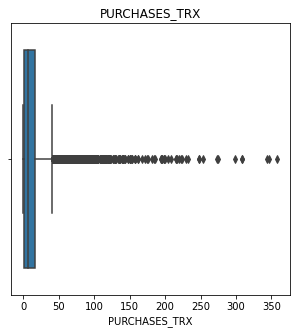

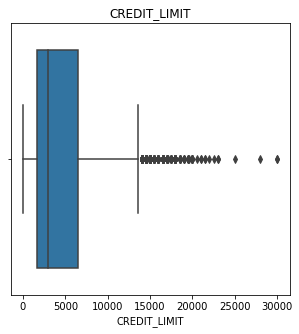

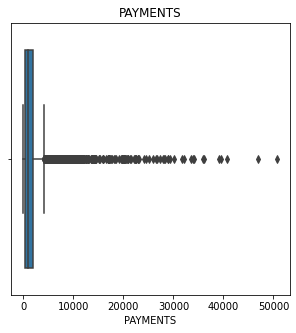

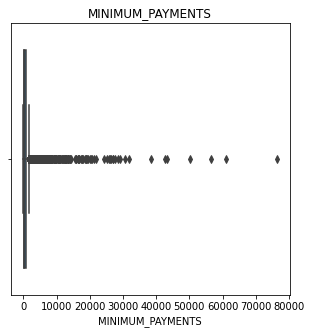

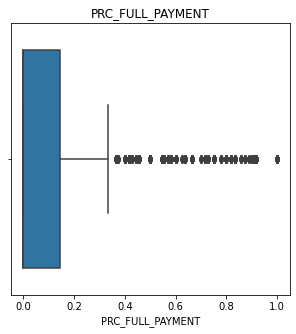

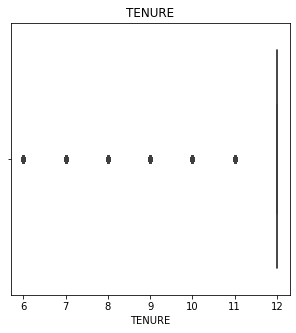

In [405]:
for feature in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

Dari data atas, kita dapat mengetahui masih terdapat atribut dengan data outlier yang cukup besar.

7. Melihat korelasi dari setiap kolom 


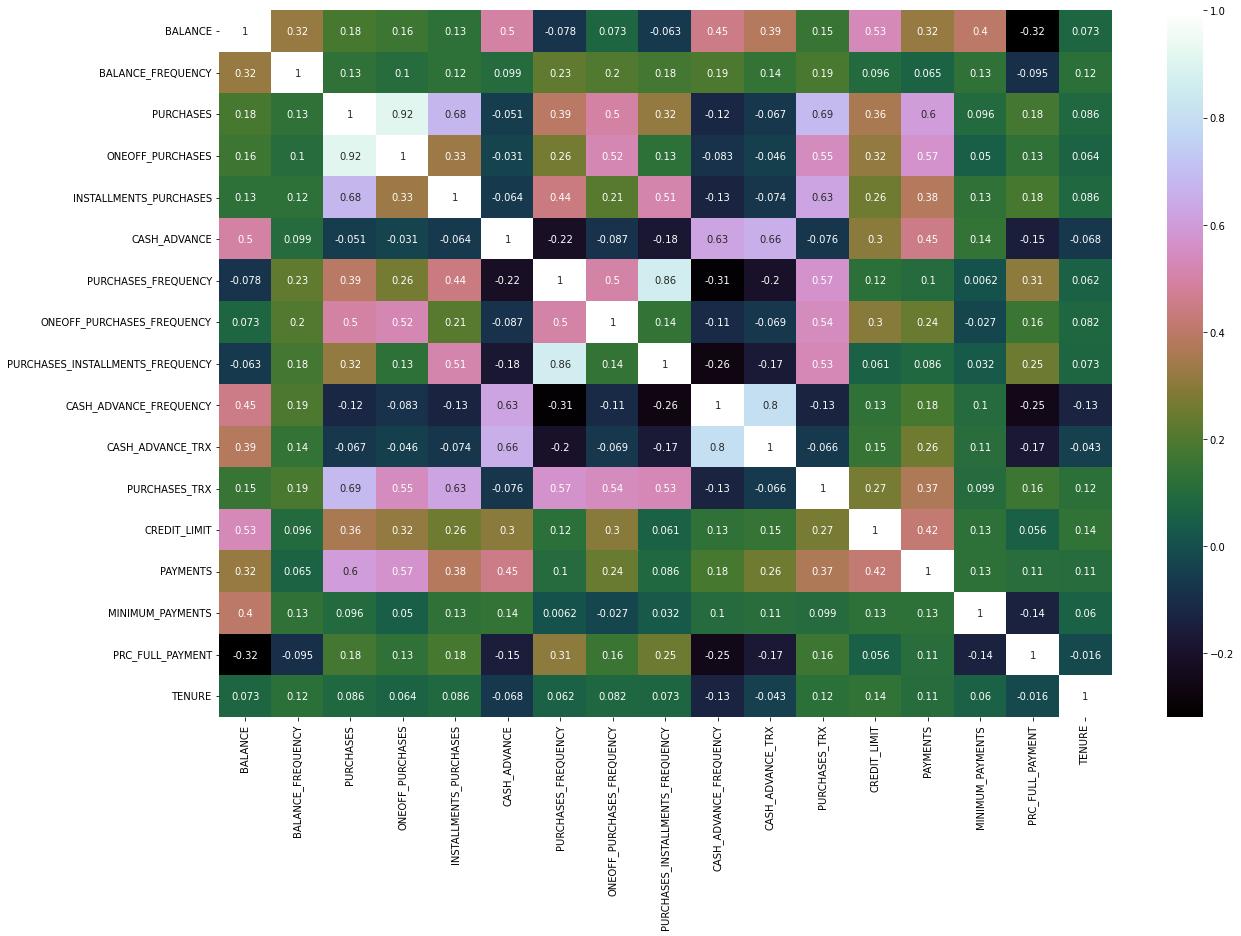

In [406]:
plt.figure(figsize=(20, 13))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix')
plt.show()

Dari histogram diatas dapat diketahui
-Jumlah korelasi tertinggi ada pada PURCHASES dengan ONEOFF_PURCHASES korelasi 0.92
-Jumlah korelasi terendah ada pada PRC_FULL_PAYMENT dengan TENURE korelasi -0.016 

# **F. Data Preprocessing**
Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

1. Merubah data menjadi angka sehingga dapat diolah

In [407]:
scaler = StandardScaler() 
scaled = scaler.fit_transform(df)


In [408]:
#Menampilkan data yang telah diubah
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [204]:
#Menambahkan kolom segmentasi

In [409]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=3)

In [410]:
data_kmeans = df.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

In [412]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
0,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
2,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


In [220]:
#Merubah nama pada dataframe

In [414]:
data_transf_kmeans.rename({0:'Middle Ground', 
                           1:'High Credit Frequent Purchasers', 
                           2:'High Cash Advance Users', 
                           3:'Frugal Credit Users'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans Segment,,,,,,,,,,,,,,,,,
Middle Ground,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
High Credit Frequent Purchasers,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
High Cash Advance Users,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
Frugal Credit Users,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


In [415]:
#Memasukkan kedalam kolom
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Middle Ground', 
                                                           1:'High Credit Frequent Purchasers', 
                                                           2:'High Cash Advance Users', 
                                                           3:'Frugal Credit Users'})

data_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,High Cash Advance Users
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Middle Ground
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,Frugal Credit Users
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2,High Cash Advance Users
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,High Cash Advance Users


In [416]:
data=data_kmeans.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [417]:
#Menghapus kolom yang tidak digunakan
drop_cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT']

In [418]:
data = data.drop(drop_cols, axis=1)
data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,KMeans Segment,Labels
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,12,2,High Cash Advance Users
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,0,Middle Ground
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,3,Frugal Credit Users
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,2,High Cash Advance Users
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,2,High Cash Advance Users


In [419]:
X = data.drop(['Labels'], axis=1)
y = data['Labels']

print(X.shape)
print(y.shape)

(8950, 10)
(8950,)


In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=325)

In [421]:
print(X_train.shape)
print(X_test.shape)

(6265, 10)
(2685, 10)


# **G. Model Defining**
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.


**Model yang akan digunakan yaitu K-Means Clustering dan Random Forest Classifer**

## **Model 1: K-Means Clustering** 
yakni untuk mengetahui hubungan dari sebuah klaster

In [422]:
clf = KMeans(n_clusters=2)
clf

KMeans(n_clusters=2)

## **Model 2 : Random Forest Classifier** 
yakni Model dan pelatihan dengan GAUSSIAN CLASSIFIER n estimator 100

In [423]:
clf1 = RandomForestClassifier(n_estimators=100)

# **H. Model Training**
pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

## **Model 1: K-Means Clustering**

In [424]:
model = clf.fit(X_train, y_train)

## **Model 2 : Random Forest Classifier**

In [426]:
model1 = clf1.fit(X_train, y_train)

# **I. Model Evaluation**
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

## **Model 1: K-Means Clustering**

Evaluasi K-means clustering tidak bisa dilakukan seperti pada model lain yang melakukan pengecekan akurasi, sehingga yang perlu dilakukan yaitu melakukan analisa secara meluas pada setiap kolom

In [427]:
model

KMeans(n_clusters=2)

**Membandingkan Balance dengan PURCHASES**

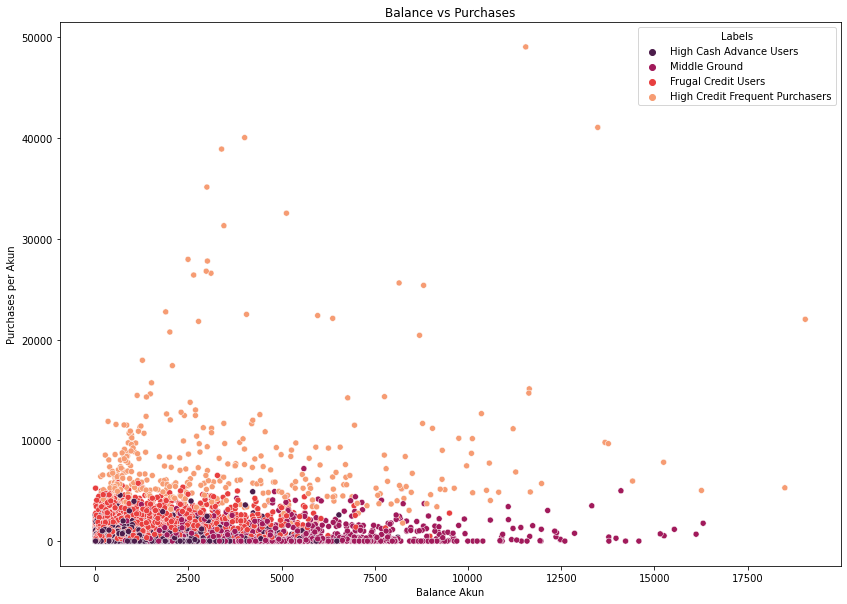

<Figure size 432x288 with 0 Axes>

In [428]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Balance Akun')
g.set_ylabel('Purchases per Akun')
g.set_title('Balance vs Purchases')
plt.show()

plt.savefig("Balance vs Purchases KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Ingat disectian sebelumnya kita pernah melakukan penambahan laber serta mendefinisikan nilainya dan itu digunakan sebagai dasar analisa ini. Diatas klaster diatas kita dapat mengetahui ada 4 klaster hasil dari pembagian yang mana pembelian terbesar hampir mencapai 50k dan balance terbesar dari sebuah akun lebih dari 17500

**Membandingkan Credit Limit dengan Purchases**


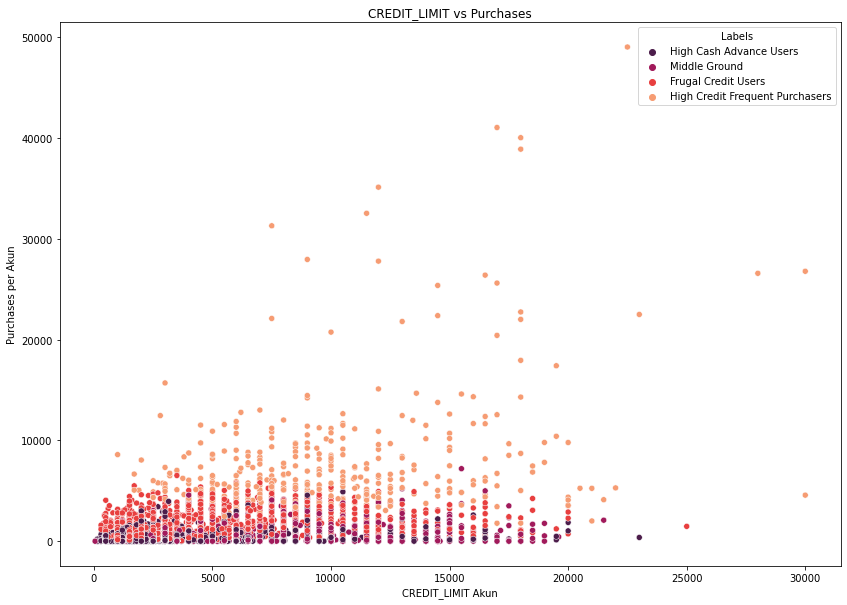

<Figure size 432x288 with 0 Axes>

In [429]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('CREDIT_LIMIT Akun')
g.set_ylabel('Purchases per Akun')
g.set_title('CREDIT_LIMIT vs Purchases')
plt.show()

plt.savefig("CREDIT_LIMIT vs Purchases KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dapat diketahui kredit limit terbesar mencapai 50K dan rata rata limit kredit berada diangka kurang dari 20k

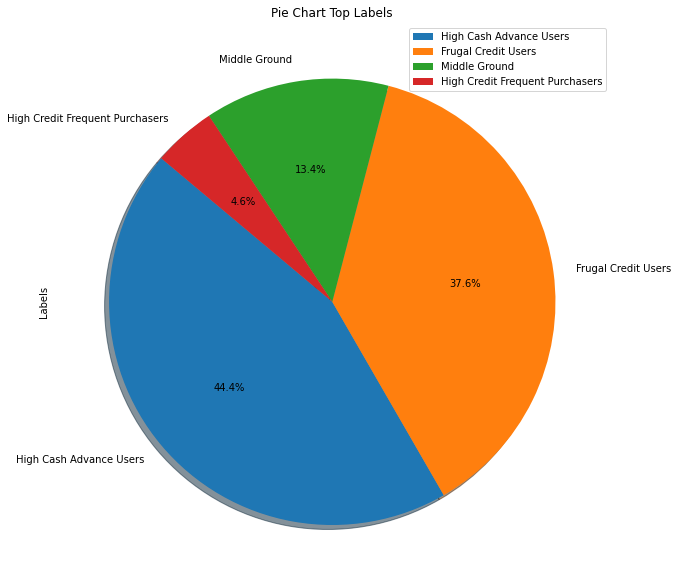

In [430]:
df_v = pd.DataFrame(data_kmeans['Labels'].value_counts())
plot = df_v.head().plot.pie(y='Labels', figsize=(10, 15), autopct='%1.1f%%',shadow=True, startangle=140);
explode = (0.1, 0, 0, 0, 0, 0)
plt.title("Pie Chart Top Labels")
plt.show()



Presentasi ukuran dari label yang ada dari dataset yang kita punya, diketahui High Cash Advance Users mempunyai jumlah sebesar 44.4% kemudian disusul oleh Frugal Credit Users dengan 37.6% dan yang ketiha High Credit Frequent Purchasers dengan 13.4%. Terakhir ada High Credit Frequent Purchasers

## **Model 2 : Random Forest Classifier**

In [432]:
model1

RandomForestClassifier()

Memeriksa performa dengan .prdict_proba() yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol / sat

In [433]:
model1.predict_proba(X_test)

array([[0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       ...,
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.  , 0.05],
       [1.  , 0.  , 0.  , 0.  ]])

melihat predicted outputs dengan .predict()

In [356]:
y_pred1 = model1.predict(X_test)
y_pred1

array(['High Cash Advance Users', 'Middle Ground', 'Middle Ground', ...,
       'High Cash Advance Users', 'High Cash Advance Users',
       'Frugal Credit Users'], dtype=object)

melihat nilai akurasi dengan .score

In [357]:
print("Test score:", model1.score(X_test, y_test))
print("Train score:", model1.score(X_train, y_train))

Test score: 1.0
Train score: 1.0


Melihat confussion matrix dan classification report dari model

In [358]:
confusion_matrix(y_test, y_pred)

array([[ 999,    0,    0,    0],
       [   0, 1206,    0,    0],
       [   0,    0,  128,    0],
       [   0,    0,    0,  352]])

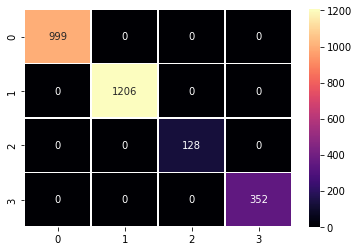

                                 precision    recall  f1-score   support

            Frugal Credit Users       1.00      1.00      1.00       999
        High Cash Advance Users       1.00      1.00      1.00      1206
High Credit Frequent Purchasers       1.00      1.00      1.00       128
                  Middle Ground       1.00      1.00      1.00       352

                       accuracy                           1.00      2685
                      macro avg       1.00      1.00      1.00      2685
                   weighted avg       1.00      1.00      1.00      2685



In [434]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'magma')
plt.show()
print(classification_report(y_test, y_pred))

In [435]:
print('Ringkasan Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred, average='macro'))
print('F1 Score :', f1_score(y_test,y_pred, average='macro'))

Ringkasan Evaluasi Model Random Forest Classifier
Akurasi : 1.0
Presisi : 1.0
F1 Score : 1.0


Dari Evaluasi model diketahui bahwa hasil akurasi model random forest classifier yaitu 84% (0.838) yang artinya hasil sudah baik dan bisa dibilang akurat sehingga model ini bisa digunakan untuk dilakukan penentuan cluster pengguna


## **Kesimpulan**
Setelah dibandingkan maka Model yang akan digunakan yaitu Random Forest Classifer

# **J. Model Inference**
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [ ]:
print('--- PREDIKSI PENENTUAN CLUSTER PENGGUNA KARTU KREDIT MENGGUNAKAN RANDOM FOREST ---')
print('='*100)

BALANCE = float(input('BALANCE (contoh : 40.9321) = '))
PURCHASES = float(input('PURCHASES (exp : 16.0) = '))
ONEOFF_PURCHASES = float(input('ONEOFF_PURCHASES (exp : 16.0) = '))
INSTALLMENTS_PURCHASES = float(input('INSTALLMENTS_PURCHASES (exp : 95.0) = '))
CASH_ADVANCE = float(input('PCASH_ADVANCE (exp : 205.23) = '))
CREDIT_LIMIT = float(input('CREDIT_LIMIT(exp : 7000.0) = '))
PAYMENTS = float(input('PAYMENTS (exp : 312.87) = '))
MINIMUM_PAYMENTS = float(input(' MINIMUM_PAYMENTS (exp : 1072.87) = '))
TENURE = int(input(' TENURE(inputan := '))

val = [BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, TENURE]
print(val)

predict_rfc = model1.predict([val])
print('='*100)
print('Berdasarkan analisa, pengguna masuk kedalam cluster : ', predict_rfc)

https://keempat.adaptable.app/

In [436]:
pickle.dump(model1, open('model1.pkl', 'wb'))

# **Conclusions**




Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut: 

*  Dari 18 kolom, yang paling bisa mempengaruhi dalam cluster credit card ada 8 kolom
*  Missing value ada di kolom CREDIT_LIMIT sebanyak 1 dan kolom MINIMUM_PAYMENTS sebanyak 313 baris
*  Balance rata-rata yaitu 1564 dan saldo terbesar yaitu 19043
*Jumlah korelasi tertinggi ada pada PURCHASES dengan ONEOFF_PURCHASES korelasi 0.92
*Jumlah korelasi terendah ada pada PRC_FULL_PAYMENT dengan TENURE korelasi -0.016 
*Model yang paling optimal untuk digunakan yaitu model Random Forest Classifer diperoleh akurasi testing 100%.
